<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [3]:
# A:
# Reading in the CSV file. 
# After looking at dtypes, zip code is an int. Needs to be a str
# re-loaded in data to change zip to str
sac_df = pd.read_csv(sac_csv, dtype={'zip': 'str'})

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
#Running .head() ot get an overview of the data
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
#Not sure if we'll need to plot lon/lat so I'm commenting this out for now:

#Since we have the exact street address, Latitude and longitude seem unneccessary
# Dropping those columns and looking at updated df with .head()
# sac_df.drop(columns=['latitude', 'longitude'], inplace=True)

In [6]:
#Looking at the dtypes of the columns
sac_df.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [7]:
# Looking to see if we have any null values
sac_df.isnull().sum()

# No null values, so no need to remove or update anything

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
# Looking at the shape to get a better idea of how our data is structured
sac_df.shape

(985, 12)

In [9]:
# looking at the .describe() function to get an overview of the summary statistic
sac_df.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


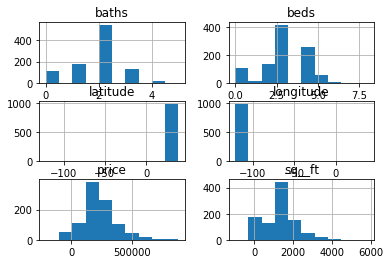

In [10]:
#Creating histograms of the df to get an overview of the skews
sac_df.hist();

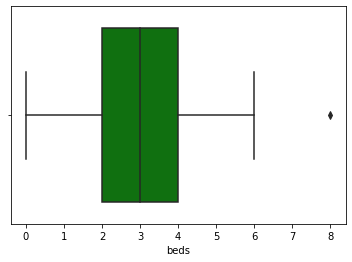

In [11]:
# Creating box plot for each numeric category to see if anything stands out
sns.boxplot(sac_df['beds'], 
            color = 'green');

In [12]:
# Sorting values on beds to identify which one is the outlier
sac_df.sort_values('beds').tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
137,5579 JERRY LITELL WAY,SACRAMENTO,95835,CA,5,3,3599,Residential,Wed May 21 00:00:00 EDT 2008,381300,38.677126,-121.500519
157,315 JUMEL CT,EL DORADO HILLS,95762,CA,6,5,0,Residential,Wed May 21 00:00:00 EDT 2008,830000,38.669931,-121.059580
648,8198 STEVENSON AVE,SACRAMENTO,95828,CA,6,4,2475,Multi-Family,Fri May 16 00:00:00 EDT 2008,159900,38.465271,-121.404260
779,9452 RED SPRUCE WAY,ELK GROVE,95624,CA,6,3,2555,Residential,Fri May 16 00:00:00 EDT 2008,300000,38.404505,-121.346938
108,2912 NORCADE CIR,SACRAMENTO,95826,CA,8,4,3612,Multi-Family,Wed May 21 00:00:00 EDT 2008,282400,38.559505,-121.364839


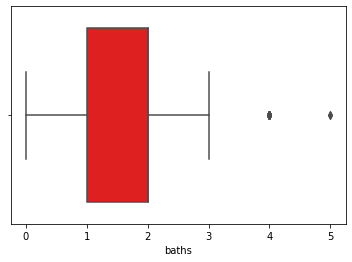

In [13]:
# Creating box plot for each numeric category to see if anything stands out
sns.boxplot(sac_df['baths'], 
            color = 'red');

In [14]:
# Sorting values on baths to identify which ones are the outliers
sac_df.sort_values('baths').tail(22)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
266,5342 CALABRIA WAY,SACRAMENTO,95835,CA,4,3,2030,Residential,Tue May 20 00:00:00 EDT 2008,270000,38.671807,-121.498274
855,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Residential,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337
847,6196 EDGEHILL DR,EL DORADO HILLS,95762,CA,5,4,0,Residential,Fri May 16 00:00:00 EDT 2008,508000,38.676131,-121.038931
538,6935 ELM TREE LN,ORANGEVALE,95662,CA,4,4,3056,Residential,Mon May 19 00:00:00 EDT 2008,475000,38.693041,-121.232940
113,10158 CRAWFORD WAY,SACRAMENTO,95827,CA,4,4,2213,Multi-Family,Wed May 21 00:00:00 EDT 2008,297000,38.570300,-121.315735
120,4359 CREGAN CT,RANCHO CORDOVA,95742,CA,5,4,3516,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.545128,-121.224922
451,10949 SCOTSMAN WAY,RANCHO CORDOVA,95670,CA,5,4,2382,Multi-Family,Mon May 19 00:00:00 EDT 2008,236000,38.603686,-121.277844
278,1102 CHESLEY LN,LINCOLN,95648,CA,4,4,0,Residential,Tue May 20 00:00:00 EDT 2008,297500,38.864864,-121.313988
108,2912 NORCADE CIR,SACRAMENTO,95826,CA,8,4,3612,Multi-Family,Wed May 21 00:00:00 EDT 2008,282400,38.559505,-121.364839


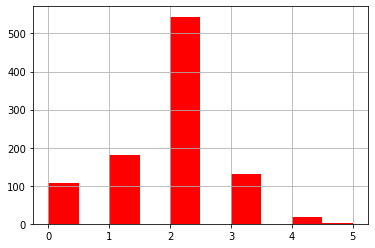

In [15]:
# some outliers, so creating a histogram of JUST baths to better view the skew
sac_df.baths.hist(color='red');

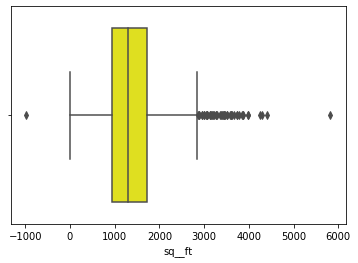

In [16]:
# Creating box plot for each numeric category to see if anything stands out
sns.boxplot(sac_df['sq__ft'], 
            color = 'yellow');

In [17]:
# Sorting values on sq__ft to identify which ones are the outliers (too many to really view properly)
sac_df.sort_values('sq__ft').tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
317,9760 LAZULITE CT,ELK GROVE,95624,CA,4,3,3992,Residential,Tue May 20 00:00:00 EDT 2008,460000,38.403609,-121.335541
535,3027 PALMATE WAY,SACRAMENTO,95834,CA,5,3,4246,Residential,Mon May 19 00:00:00 EDT 2008,452000,38.628955,-121.529269
534,5201 BLOSSOM RANCH DR,ELK GROVE,95757,CA,4,4,4303,Residential,Mon May 19 00:00:00 EDT 2008,450000,38.399436,-121.444041
864,9401 BARREL RACER CT,WILTON,95693,CA,4,3,4400,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337


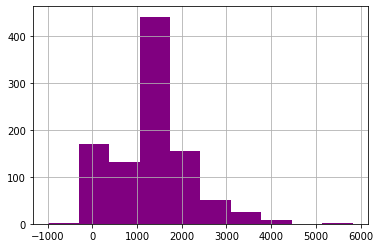

In [18]:
# Lots of outliers, so creating a histogram of JUST sq__ft to better view the skew
sac_df.sq__ft.hist(color='purple');

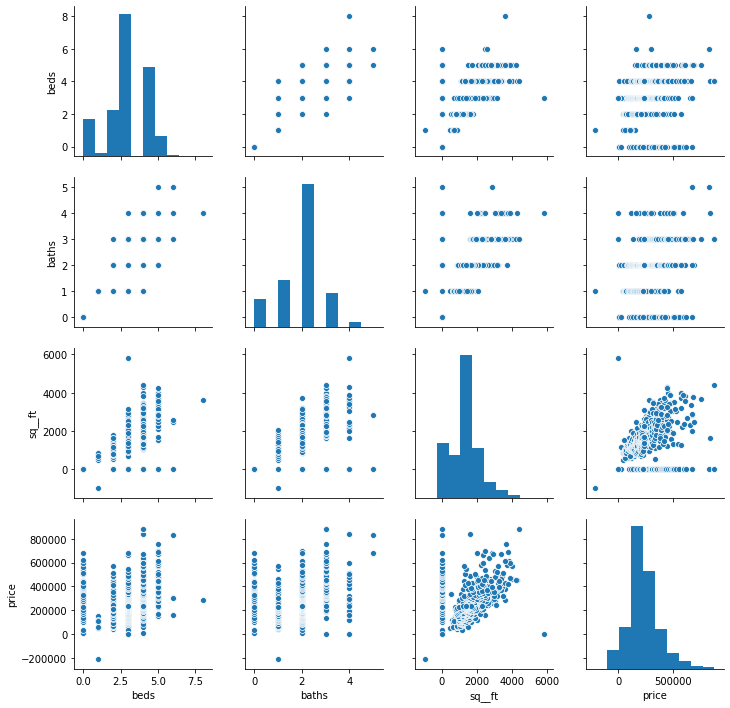

In [19]:
#Creating a pairplot to view data another way
sns.pairplot(sac_df[['beds', 'baths', 'sq__ft', 'price']]);
             

In [20]:
#Using .corr() to see how our columns are correlated
sac_df.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684999,0.344752,0.038315,-0.048107
baths,0.839650,1.000000,0.665326,0.416718,0.020946,-0.027232
sq__ft,0.684999,0.665326,1.000000,0.339628,0.074660,-0.090353
price,0.344752,0.416718,0.339628,1.000000,0.100806,-0.094262
latitude,0.038315,0.020946,0.074660,0.100806,1.000000,-0.998927
longitude,-0.048107,-0.027232,-0.090353,-0.094262,-0.998927,1.000000


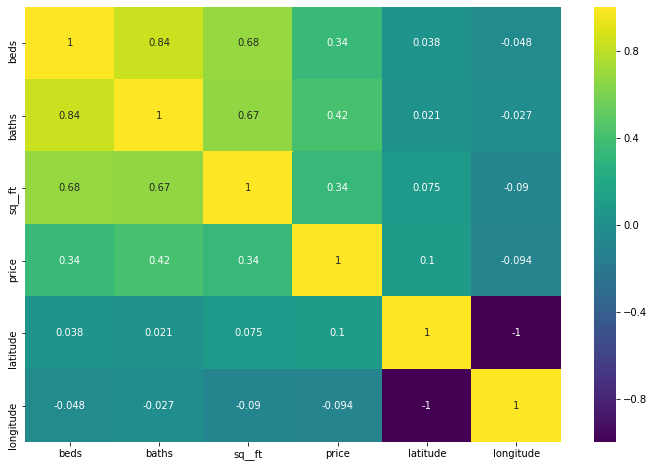

In [21]:
#Throwing our correlation into a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sac_df.corr(), annot=True, cmap='viridis');

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

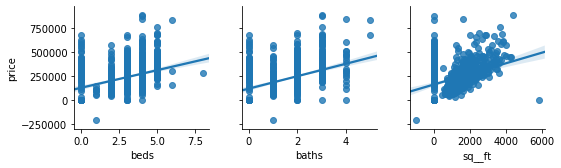

In [22]:
#Although none of them seem strong - 
#beds, baths and sq__ft seem to be most closely correlated with price
sns.pairplot(sac_df,
             x_vars = ['beds', 'baths', 'sq__ft'], 
             y_vars = ['price'],
             kind='reg');

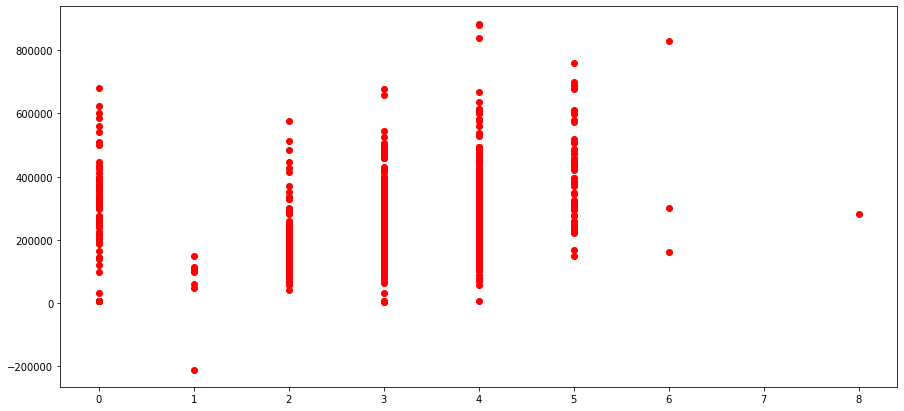

In [23]:
plt.figure(figsize=(15, 7))
plt.scatter(sac_df['beds'], 
            sac_df['price'],
            color='red');

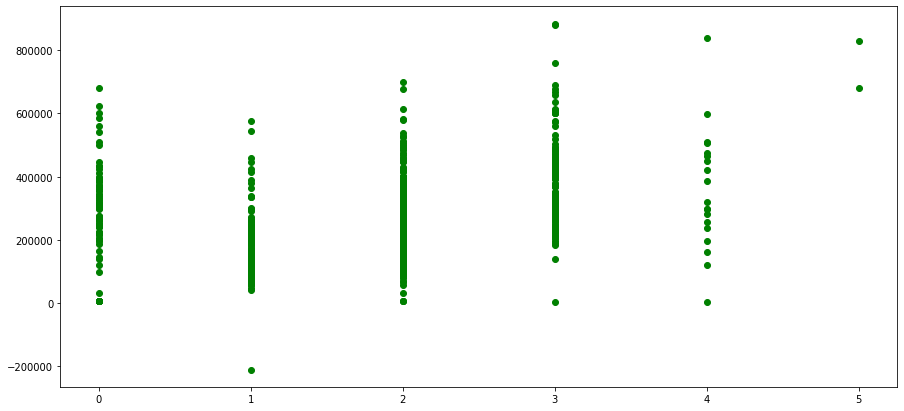

In [24]:
plt.figure(figsize=(15, 7))
plt.scatter(sac_df['baths'], 
            sac_df['price'],
            color='green');

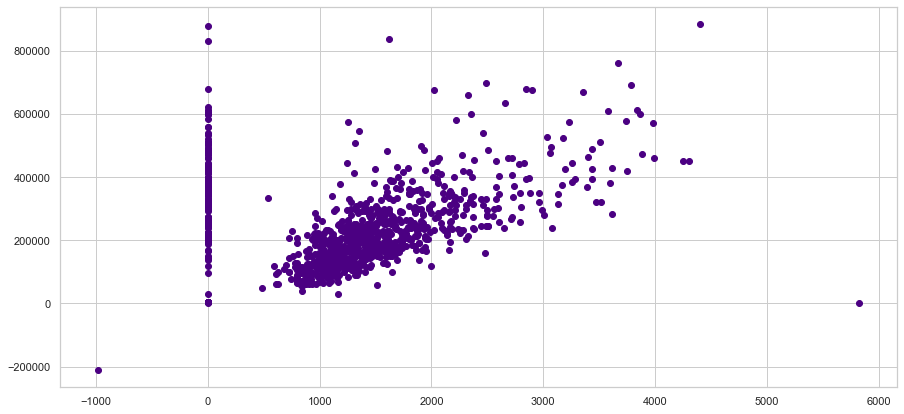

In [25]:
plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")
plt.scatter(sac_df['sq__ft'], 
            sac_df['price'],
            color='indigo');

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

ANSWER:

Out of these options it would appear that sf__ft is the best predictor of Y in an SLR model

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [26]:
#learned code from https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html
# Used code from Antony for a cleaner "return" format
def best_fit(X, y):
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    
    return {'Slope': slope, 
            'Intercept': intercept, 
            'r_value': r_value, 
            'p_value': p_value, 
            'std_err': std_err}

In [27]:
best_fit(sac_df['sq__ft'], sac_df['price'])

{'Slope': 55.1772124050075,
 'Intercept': 161272.7527792225,
 'r_value': 0.3396282559893354,
 'p_value': 5.1292395529946805e-28,
 'std_err': 4.873776086587639}

### 6. Interpret the intercept. Interpret the slope.

ANSWER:

The intercept is 161272.75. This means that if a property has 0 sqft then the cost of that property would be $161,272

The slope is 55.17. Meaning that for every 1 unit increase in square feet, the price will increase by $55.17. 


### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

ANSWER:

Prediction: We would use this model to predict how much a house might sell for if it has x number of square feet or if we increased the number of square feet. 

Inference: We could use this model to infer how many square feet a house has based on how much the house sold for. 

**The prediction and the inference wouldn't be very accurate based on this correlation. 

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

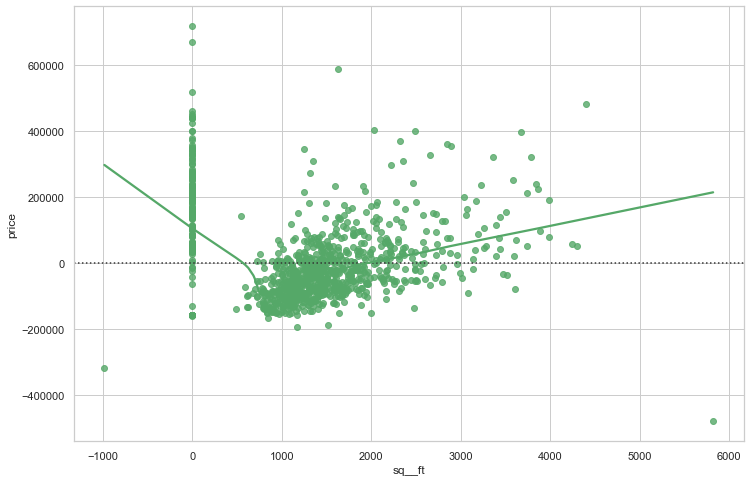

In [28]:
#No thank you
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.residplot(sac_df['sq__ft'], sac_df['price'], lowess=True, color='g')

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [29]:
# A:
pd.get_dummies(sac_df[['type']]).head()

,type_Condo,type_Multi-Family,type_Residential,type_Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [30]:
# A:
sac_df = pd.get_dummies(sac_df, columns=['type'])

In [31]:
sac_df.drop(columns=['type_Unkown'], inplace=True)

In [32]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [33]:
sac_df['beds_baths'] = sac_df['beds'] + sac_df['baths']

In [34]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Condo,type_Multi-Family,type_Residential,beds_baths
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,0,1,3
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,0,1,4
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,0,1,3
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,0,1,3
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,0,1,3


In [43]:
features = ['sq__ft', 'beds_baths', 'type_Residential']

X = sac_df[features]

y = sac_df['price']

In [74]:
ss = StandardScaler()
ss.fit(sac_df[['sq__ft', 'beds_baths']])
X_scaled = ss.transform(sac_df[['sq__ft', 'beds_baths']])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
X_scaled = pd.DataFrame(X_scaled).join(sac_df['type_Residential'], how='right')
X_scaled.head()

,0,1,type_Residential
0,-0.557351,-0.798155,1
1,-0.170528,-0.325405,1
2,-0.604097,-0.798155,1
3,-0.538653,-0.798155,1
4,-0.602928,-0.798155,1


In [68]:
model = LinearRegression()
model.fit(X_scaled, y);

In [69]:
predictions = model.predict(X_scaled)

In [70]:
residuals = y - predictions

In [71]:
residuals.mean()

6.033504750522866e-11

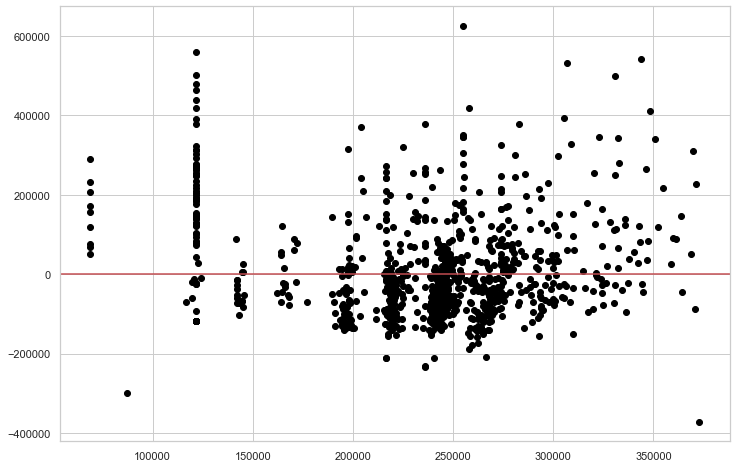

In [72]:
plt.figure(figsize=(12,8))
plt.scatter(predictions, residuals, color = 'black')
plt.axhline(0, color='r');

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

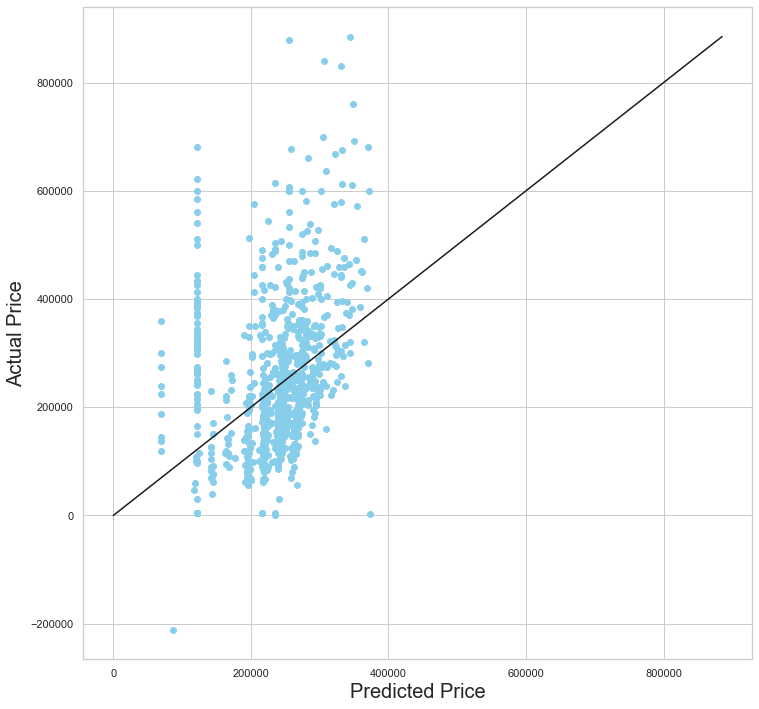

In [73]:
plt.figure(figsize=(12,12))
#Generating a scatterplot of predicted price versus actual price.
plt.scatter(predictions, y, c='skyblue')
plt.xlabel('Predicted Price', size=20)
plt.ylabel('Actual Price', size=20)

plt.plot([0, np.max(y)], [0, np.max(y)], c='k');

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

ANSWER:

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

ANSWER:
1. Independence of errors - given that there is a strong correllation with sq__ft and beds_baths (as the square feet increases, the beds and bath also tend to increase) this assumption would appear to be broken

2. Linearity - The X and y do not appear to hqve a linear relationship and therefore this would also be broken.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [40]:
# A:
# No thank you

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [75]:
#Defining a function to calculate r2 and r2 adj
def r2_adj(X, y):
    yhat = model.predict(X)
    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return {'r2': r_squared, 
            'r2_adj': adjusted_r_squared}

In [76]:
r2_adj(sac_df[features], sac_df['price'])

{'r2': -38702.893628546684, 'r2_adj': -38821.25415952084}

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [105]:
def six_metrics(y, yhat):

    return {'explained_variance_score': explained_variance_score(y, yhat), 
            'mean_absolute_error': mean_absolute_error(y, yhat), 
            'MSE': mean_squared_error(y, yhat), 
            'median_absolute_error': median_absolute_error(y, yhat),
            'r2_score': r2_score(y, yhat)}

#couldn't get the other metrics to work. tried max_error and mean_squared_log_error

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [106]:
six_metrics(sac_df['price'], predictions)

{'explained_variance_score': 0.16906685128212273,
 'mean_absolute_error': 95006.19093142028,
 'MSE': 16058663254.870094,
 'median_absolute_error': 77832.63976286585,
 'r2_score': 0.16906685128212284}

In [113]:
features1 = ['sq__ft', 'beds_baths']

X = sac_df[features1]

y = sac_df['price']

ss = StandardScaler()
ss.fit(sac_df[['sq__ft', 'beds_baths']])
X_scaled = ss.transform(sac_df[['sq__ft', 'beds_baths']])

new_model = LinearRegression()
new_model.fit(X_scaled, y);

new_predictions = new_model.predict(X_scaled)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


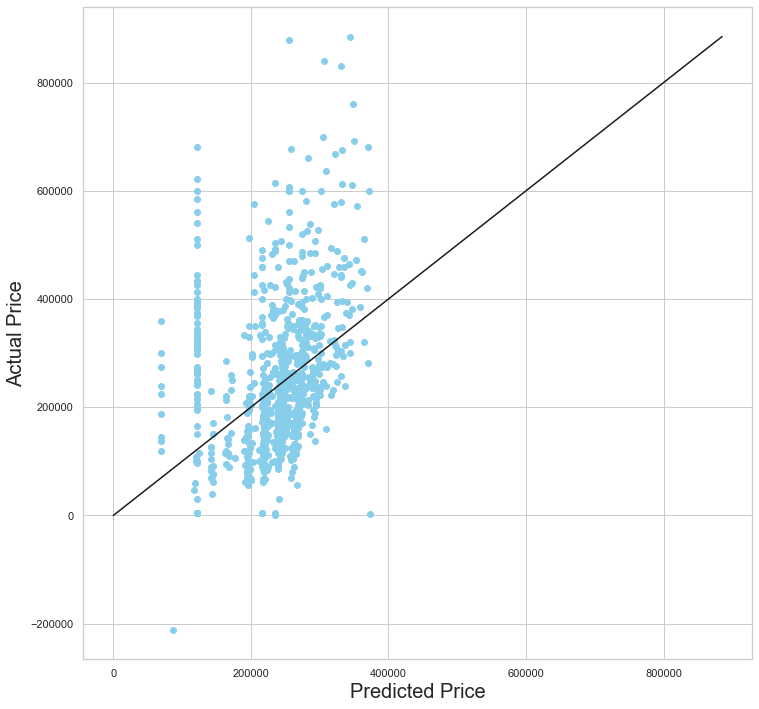

In [114]:
# Plot the model
plt.figure(figsize=(12,12))

#Generating a scatterplot of predicted price versus actual price.
plt.scatter(predictions, y, c='skyblue')
plt.xlabel('Predicted Price', size=20)
plt.ylabel('Actual Price', size=20)

plt.plot([0, np.max(y)], [0, np.max(y)], c='k');

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

ANSWER - My model has high bias. The model is underfit based on the data